In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import re
from pathlib import Path

def put_ln_normalization(normalizations,L):
    col = normalizations.columns[0]
    normalization_factor = normalizations[col].values
    if L == 1:
        return normalization_factor[0]
    
    left  = put_ln_normalization(normalizations,L//2)
    right = put_ln_normalization(normalizations,L-L//2)
    val   = normalization_factor[L-1]
    return left+right+val

def makeFolder(Filename,sep='/'):
    
    '''file name may contains several folders, so need to check individually'''
    subFolderPath = Filename.split('/')
    complete = '.'
    for subFolderP in subFolderPath:
        complete = "/".join([complete,subFolderP])
        dir_path = Path(complete)
        if not dir_path.exists():
            dir_path.mkdir()

In [51]:
Folder = 'group/'
makeFolder(Folder)
Dcut = 2048
hs = [0.39+0.001*i for i in range(80)]
Ls = [i for i in range(1,12)]
Lambda1s = {}
Lambda2s = {}

for h in hs:
    h = round(h,3)
    print(h)
    Normalization = glob.glob(r'../transfer_matrix_SingleColumn_ComplexH_NormalizationFactor/h{}_NormalizationFactor_Dcut{}.csv'.format(h,Dcut))[-1]
    Eig = glob.glob(r'./h{}_Eigenvalue_Dcut{}.csv'.format(h,Dcut))[-1]
    Normalization = pd.read_csv(Normalization)
    Eig = pd.read_csv(Eig)
    lambda1_Ls = []
    lambda2_Ls = []
    for L in Ls:
        Eig_without_normalization = Eig['L={}'.format(L)].values
        normalization = put_ln_normalization(Normalization,L)
        Eig_with_normalization = Eig_without_normalization+normalization
        lambda1 = Eig_with_normalization[0]
        lambda1_Ls.append(lambda1)
        lambda2 = Eig_with_normalization[1]
        lambda2_Ls.append(lambda2)
    Lambda1s[h] = lambda1_Ls
    Lambda2s[h] = lambda2_Ls

DF1 = pd.DataFrame(Lambda1s)
DF1.index = ['L={}'.format(L) for L in Ls]
DF1.columns = ['{:.3}'.format(h) for h in hs]
# rotate
DF1 = DF1.stack()
DF1 = DF1.unstack(0)
#--------------------#
DF1.index.name = "Dcut="+str(Dcut)


DF1.to_csv(Folder+'Lambda1s.csv')

DF2 = pd.DataFrame(Lambda1s)
DF2.index = ['L={}'.format(L) for L in Ls]
DF2.columns = ['{:.3}'.format(h) for h in hs]
# rotate
DF2 = DF2.stack()
DF2 = DF2.unstack(0)
#--------------------#
DF2.index.name = "Dcut="+str(Dcut)

DF2.to_csv(Folder+'Lambda2s.csv')



0.39
0.391
0.392
0.393
0.394
0.395
0.396
0.397
0.398
0.399
0.4
0.401
0.402
0.403
0.404
0.405
0.406
0.407
0.408
0.409
0.41
0.411
0.412
0.413
0.414
0.415
0.416
0.417
0.418
0.419
0.42
0.421
0.422
0.423
0.424
0.425
0.426
0.427
0.428
0.429
0.43
0.431
0.432
0.433
0.434
0.435
0.436
0.437
0.438
0.439
0.44
0.441
0.442
0.443
0.444
0.445
0.446
0.447
0.448
0.449
0.45
0.451
0.452
0.453
0.454
0.455
0.456
0.457
0.458
0.459
0.46
0.461
0.462
0.463
0.464
0.465
0.466
0.467
0.468
0.469


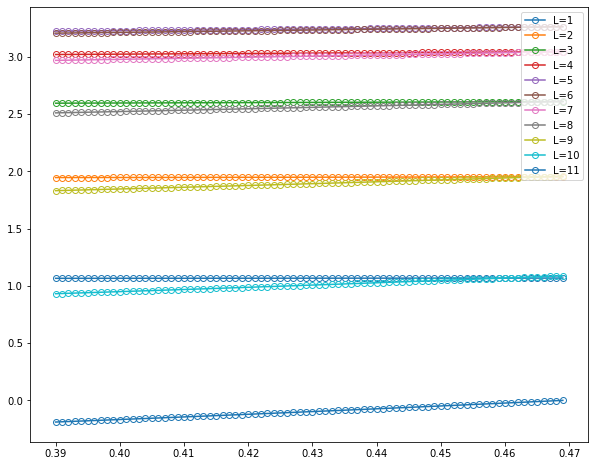

In [54]:
Folder = 'group/'
Dcut = 2048
hs = [0.39+0.001*i for i in range(80)]
Ls = [i for i in range(1,12)]

Lambda1s = pd.read_csv(Folder+'Lambda1s.csv')
Lambda2s = pd.read_csv(Folder+'Lambda2s.csv')

plt.figure(figsize=(10,8))
for L in Ls:
    lambda1s = Lambda1s['L={}'.format(L)].values
    lambda2s = Lambda2s['L={}'.format(L)].values
    correlation_length = (lambda1-lambda2s)
    correlation_length_divL = correlation_length *L / (2*np.pi)
    plt.plot(hs,correlation_length_divL,'o-',label='L={}'.format(L),fillstyle='none')
    
plt.legend(loc=1)
    
